<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">




In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.model_selection import train_test_split
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


## EDA on individual jazz compositions

In [33]:
jazz1=converter.parse('data/midi1.mid')

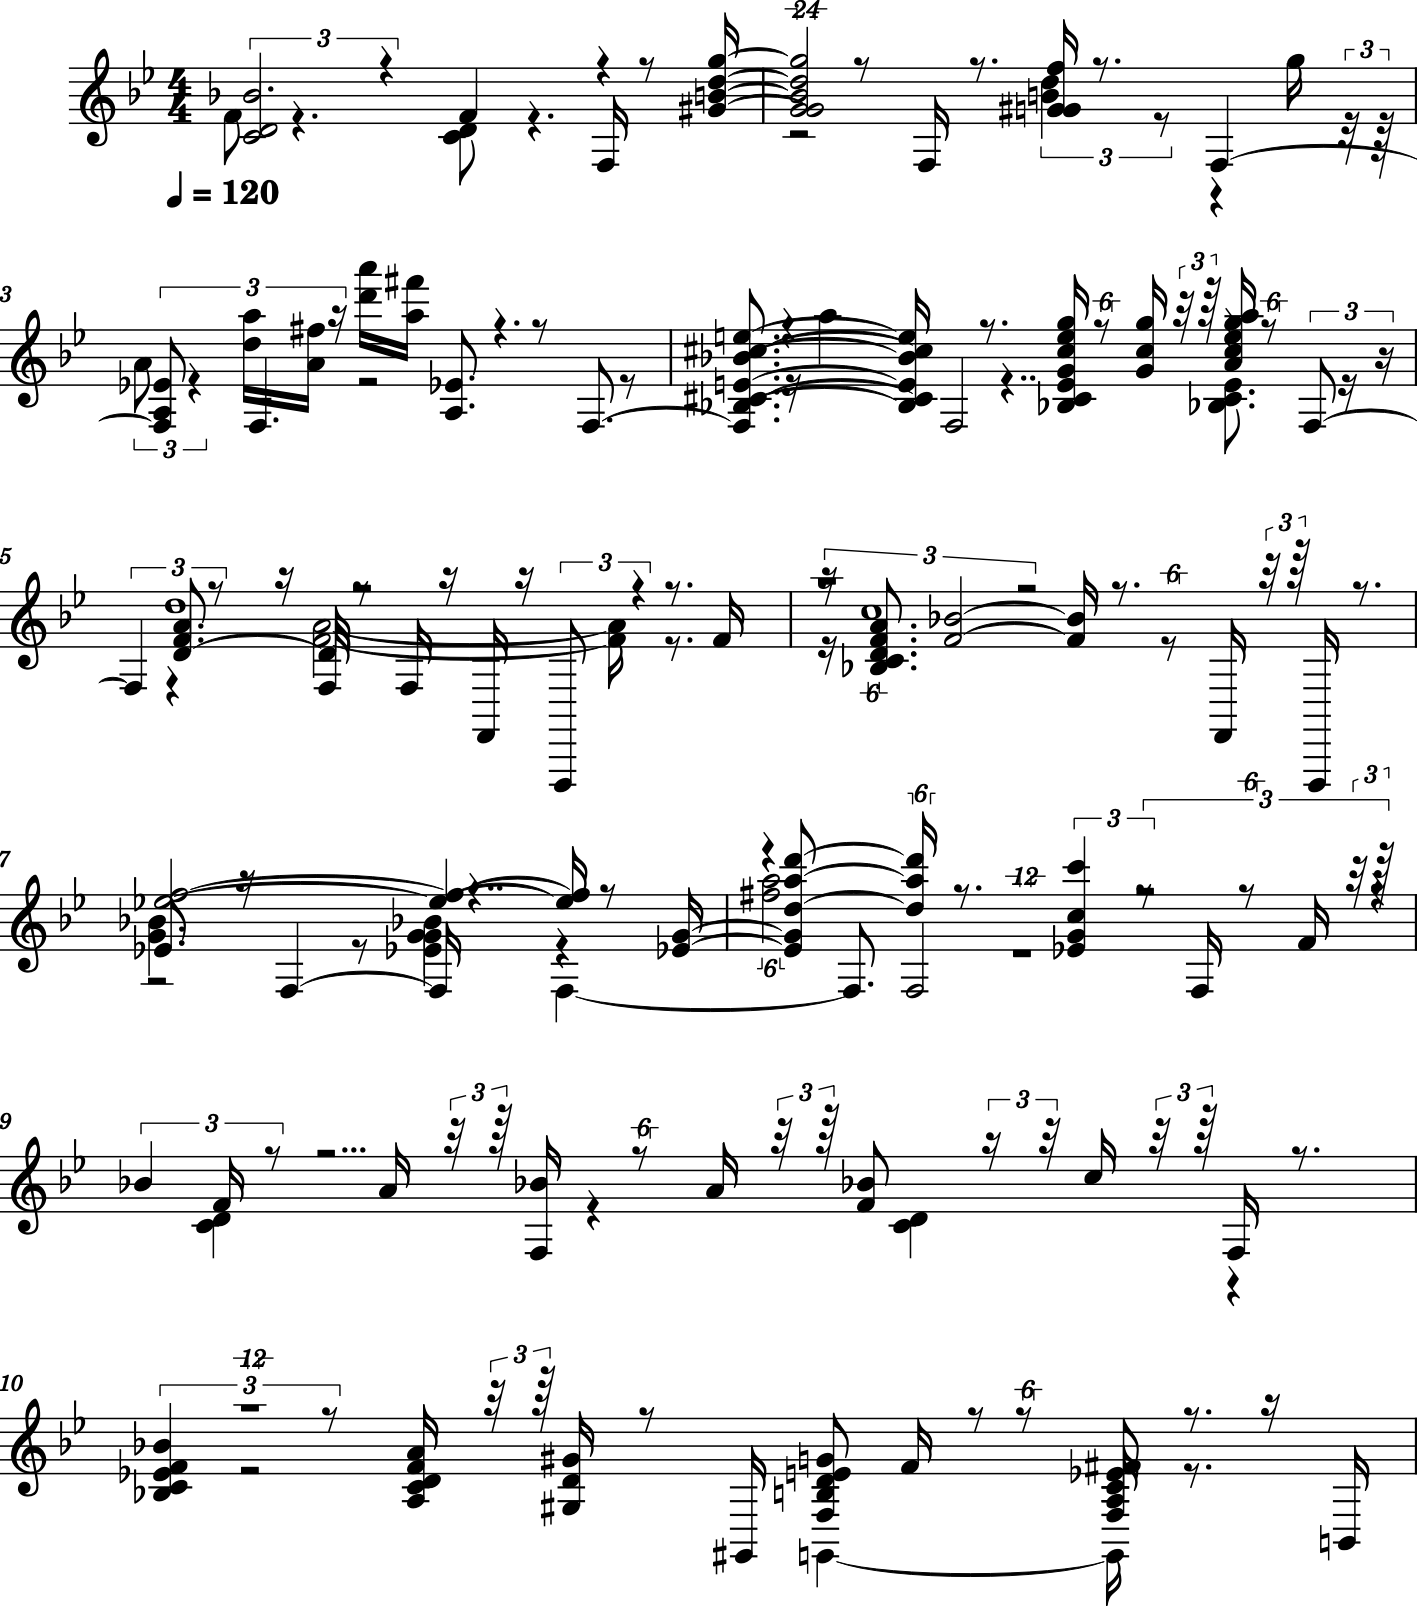

In [34]:
jazz1.id='jazz1'
jazz1.measures(1,10).show()

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score jazz1>>

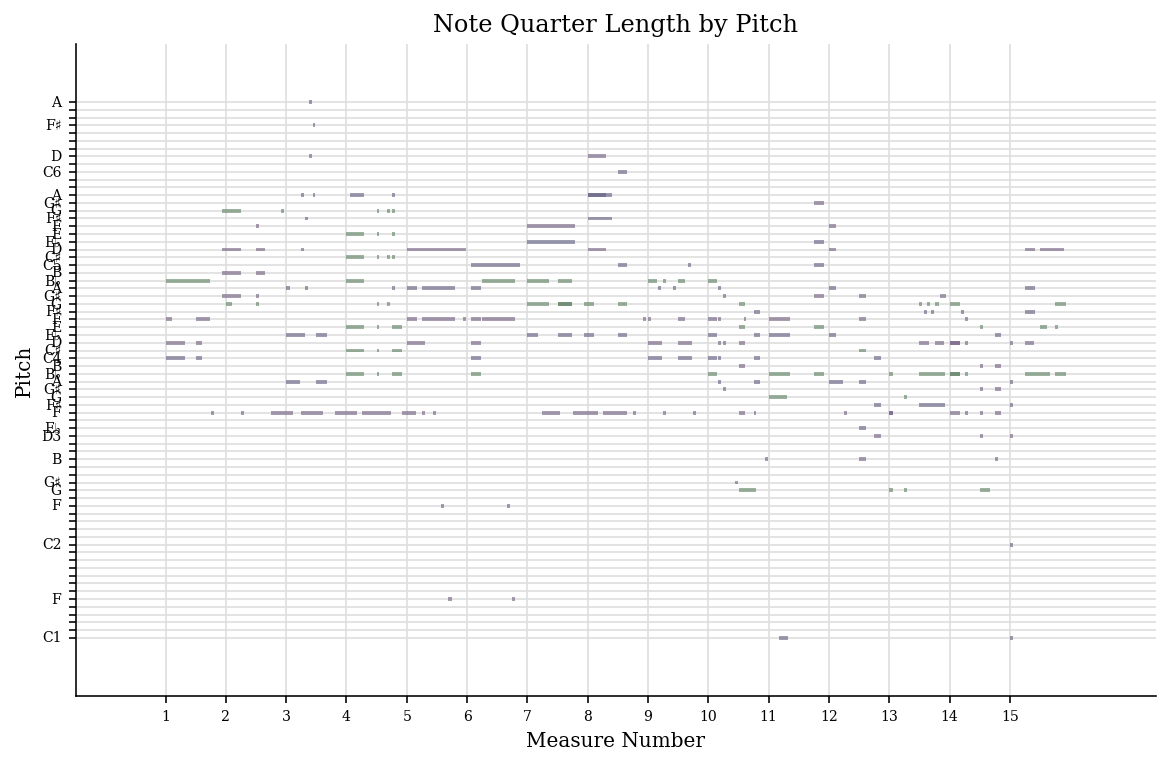

In [36]:
jazz1.measures(1,15).plot()

<music21.graph.plot.Histogram for <music21.stream.Score jazz1>>

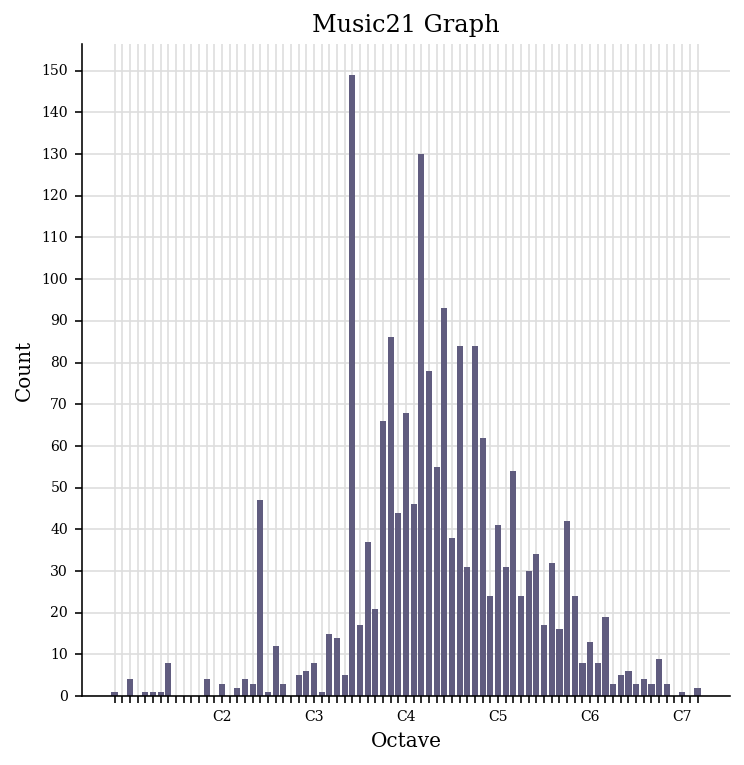

In [37]:
jazz1.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score jazz1>>

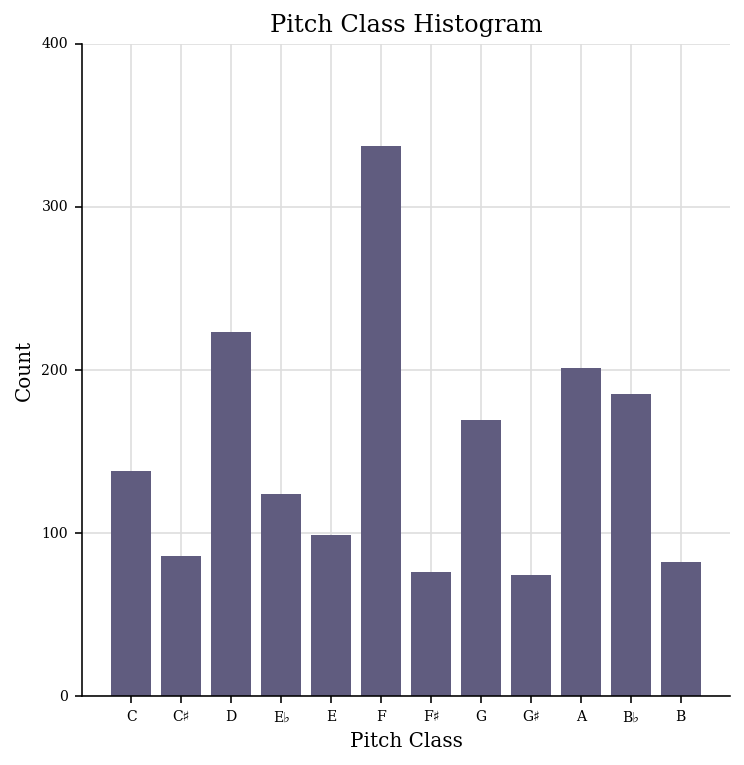

In [38]:
jazz1.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score jazz1>>

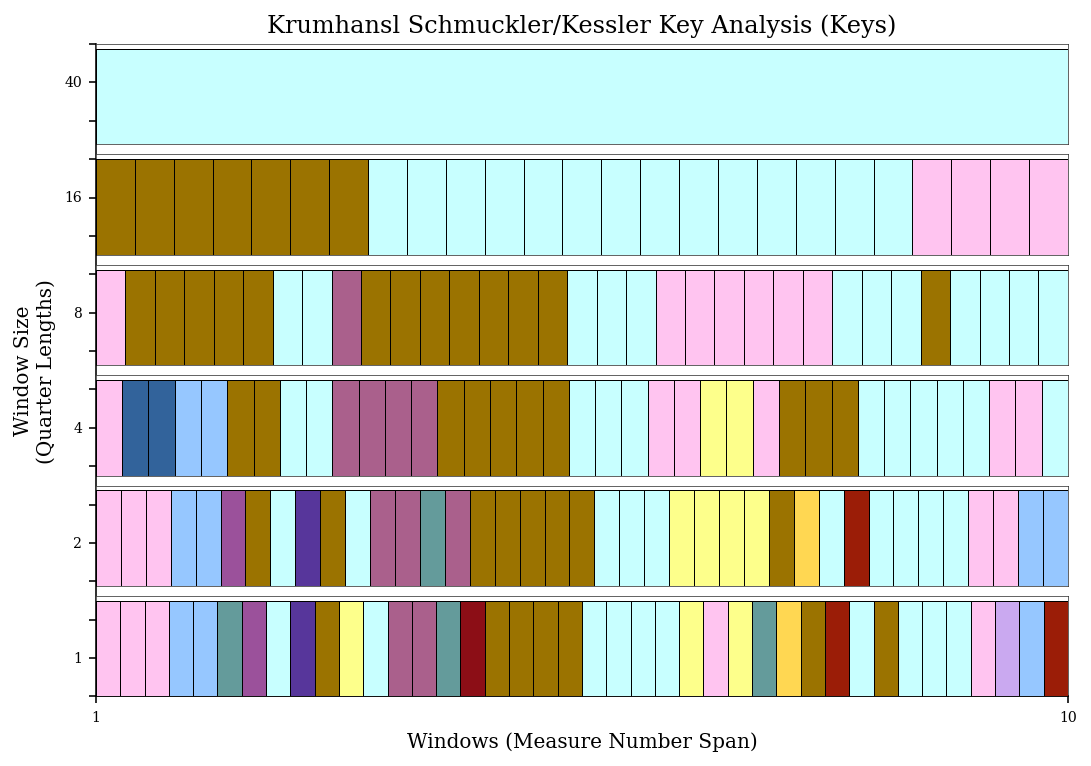

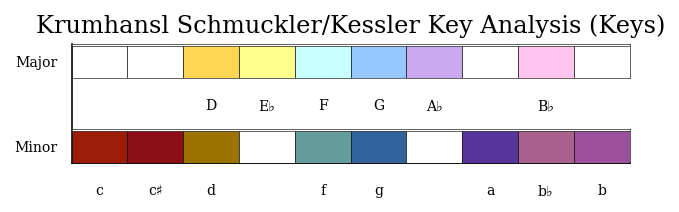

In [39]:
jazz1.measures(1,10).plot('colorgrid')

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score jazz24>>

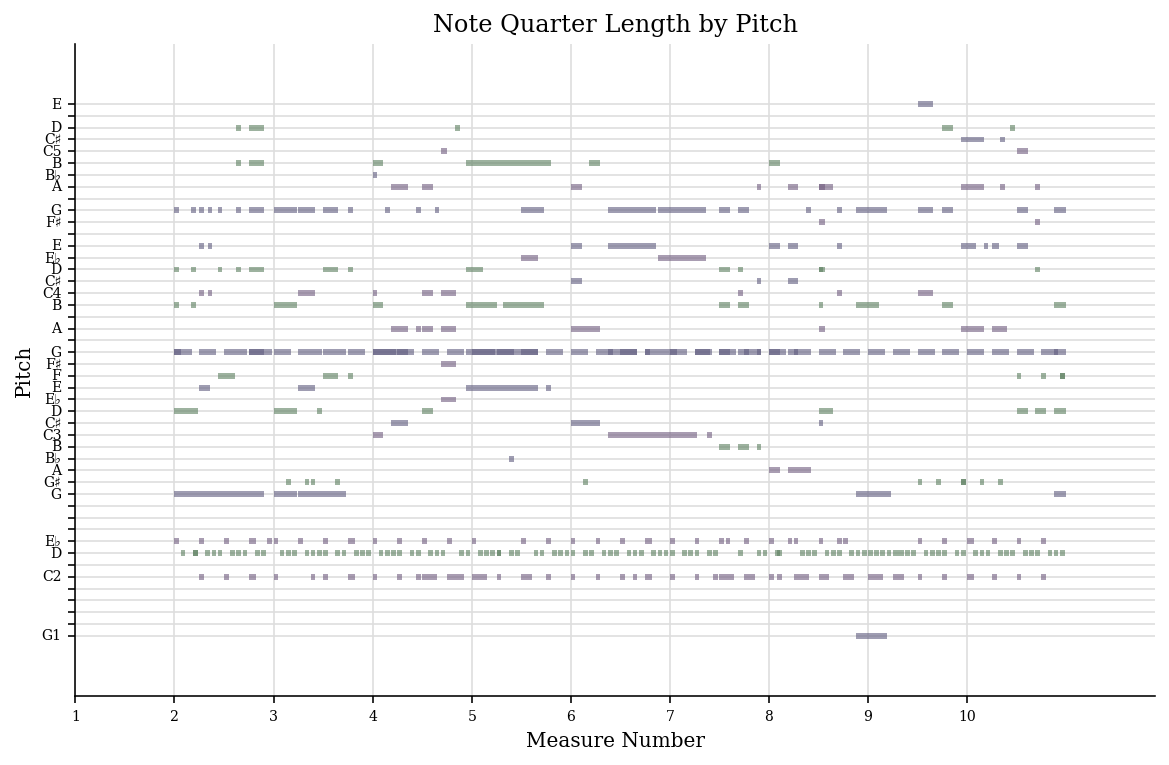

In [47]:
jazz24=converter.parse('data/midi24.mid')
jazz24.id='jazz24'
jazz24.measures(1,10).plot()

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score jazz24>>

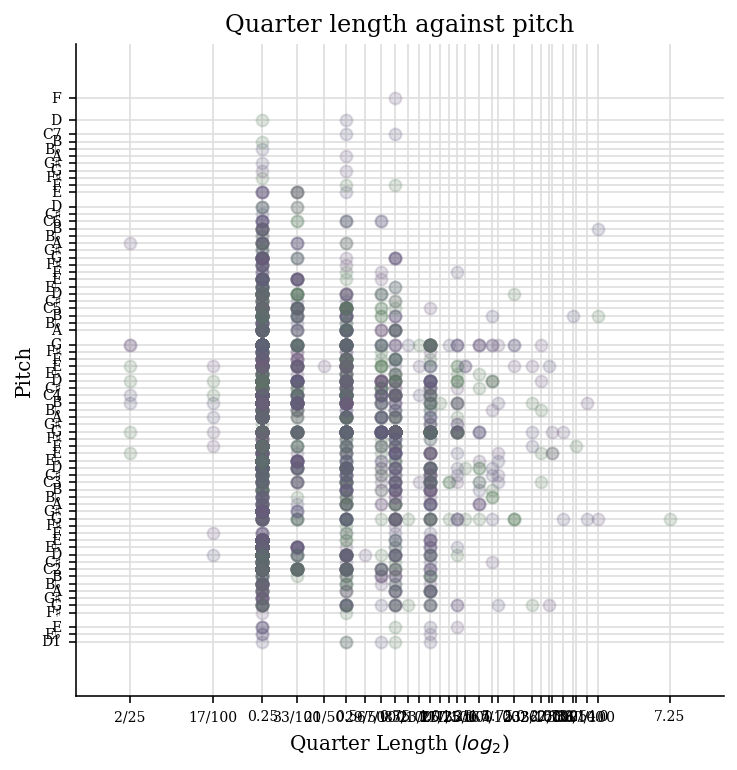

In [48]:
jazz24.plot('scatter','quarterLength','pitch',title = 'Quarter length against pitch', figure=(12,7))

<music21.graph.plot.Histogram for <music21.stream.Score jazz24>>

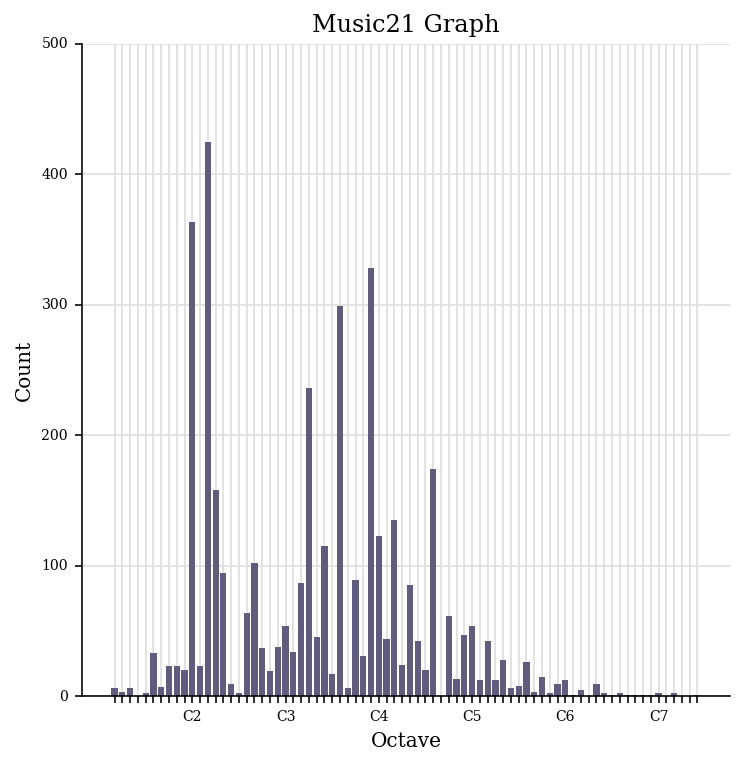

In [49]:
jazz24.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score jazz24>>

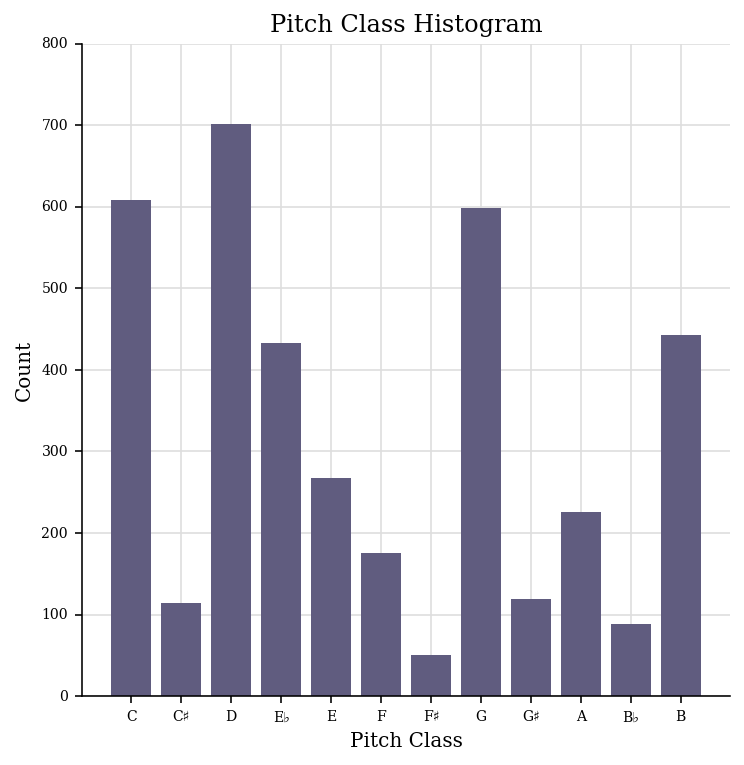

In [52]:
jazz24.plot('histogram','pitchClass')

<music21.graph.plot.WindowedKey for <music21.stream.Score jazz24>>

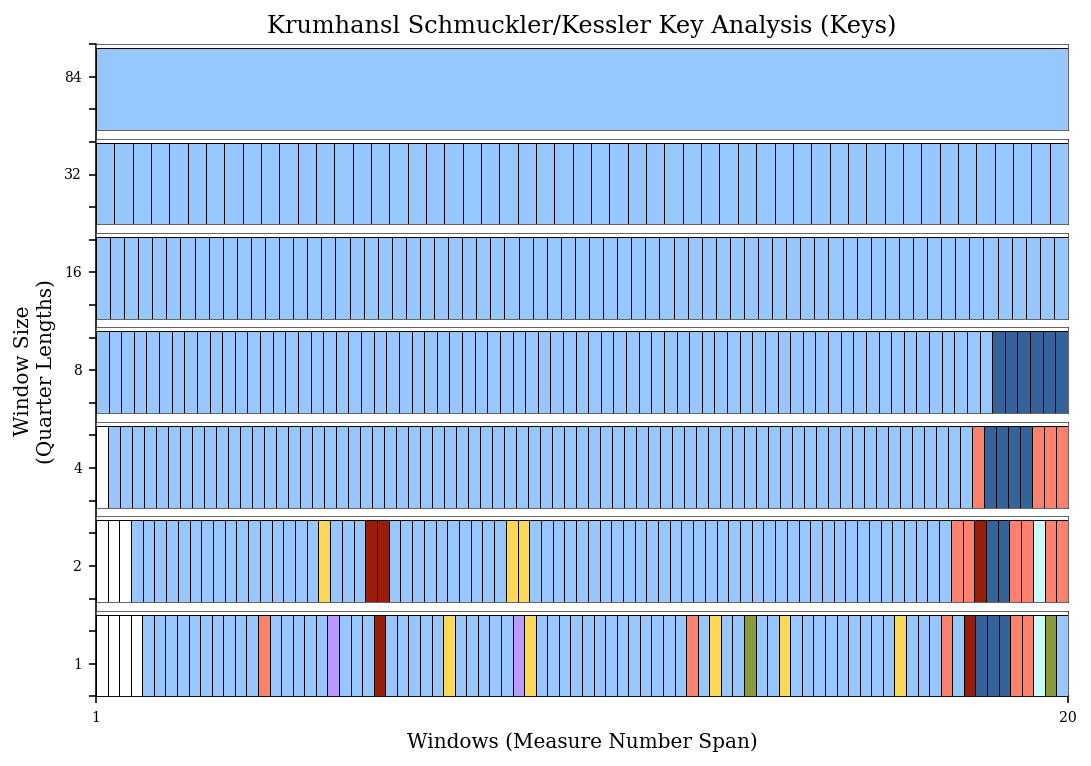

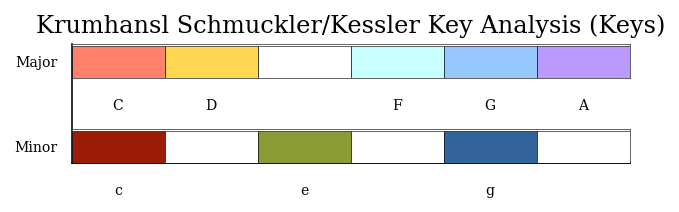

In [54]:
jazz24.measures(1,20).plot('colorgrid')

In [2]:
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [16]:
path='./data/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ./data/midi158.mid
Loading Music File: ./data/midi170.mid
Loading Music File: ./data/midi164.mid
Loading Music File: ./data/midi206.mid
Loading Music File: ./data/midi212.mid
Loading Music File: ./data/midi12.mid
Loading Music File: ./data/midi13.mid
Loading Music File: ./data/midi213.mid
Loading Music File: ./data/midi207.mid
Loading Music File: ./data/midi165.mid
Loading Music File: ./data/midi171.mid
Loading Music File: ./data/midi159.mid
Loading Music File: ./data/midi198.mid
Loading Music File: ./data/midi167.mid
Loading Music File: ./data/midi173.mid
Loading Music File: ./data/midi239.mid
Loading Music File: ./data/midi211.mid
Loading Music File: ./data/midi205.mid
Loading Music File: ./data/midi39.mid
Loading Music File: ./data/midi11.mid
Loading Music File: ./data/midi10.mid
Loading Music File: ./data/midi38.mid
Loading Music File: ./data/midi204.mid
Loading Music File: ./data/midi210.mid
Loading Music File: ./data/midi238.mid
Loading Music File: ./data/midi

midi.translate: WARNING: midi chord with zero duration will be treated as grace [((24981, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=38, velocity=33>), (25057, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=38, velocity=0>)), ((25028, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=40, velocity=12>), (25028, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=40, velocity=0>))] <music21.chord.Chord object at 0x7ff9f15ae910>
midi.translate: WARNING: midi chord with zero duration will be treated as grace [((120676, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=39, velocity=104>), (120837, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=39, velocity=0>)), ((120888, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=38, velocity=31>), (120888, <music21.midi.MidiEvent NOTE_ON, track=4, channel=10, pitch=38, velocity=0>))] <music21.chord.Chord object at 0x7ff9d0cc7c40>
midi.translate: WARNING: midi chord wit

Loading Music File: ./data/midi37.mid
Loading Music File: ./data/midi23.mid
Loading Music File: ./data/midi237.mid
Loading Music File: ./data/midi223.mid
Loading Music File: ./data/midi3.mid
Loading Music File: ./data/midi169.mid
Loading Music File: ./data/midi141.mid
Loading Music File: ./data/midi155.mid
Loading Music File: ./data/midi182.mid
Loading Music File: ./data/midi196.mid


In [18]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

1878


In [27]:
print(len(notes_))

196377


In [28]:
print("First fifty notes:",notes_[:50])

First fifty notes: ['F4', 'F3', '8', '8', '10', '10', '10', '8', '5', '10', '8', '5', '8', '8', '10', '10', '10', '8', '5', '10', '8', '5.8', 'D4', '8', '2.8', '7.10', '2.8', '7.10', 'G#4', '7.8.10.2', '2.7.8', '7.10', 'D4', 'G#3', '7.10', 'D4', 'G#3', 'G#4', 'F4', 'B-4', '5.6', 'C4', 'G#4', '3.5', '5.10.11', '3.5', '5.10.11', 'G#4', 'F4', '3.4.8.10']


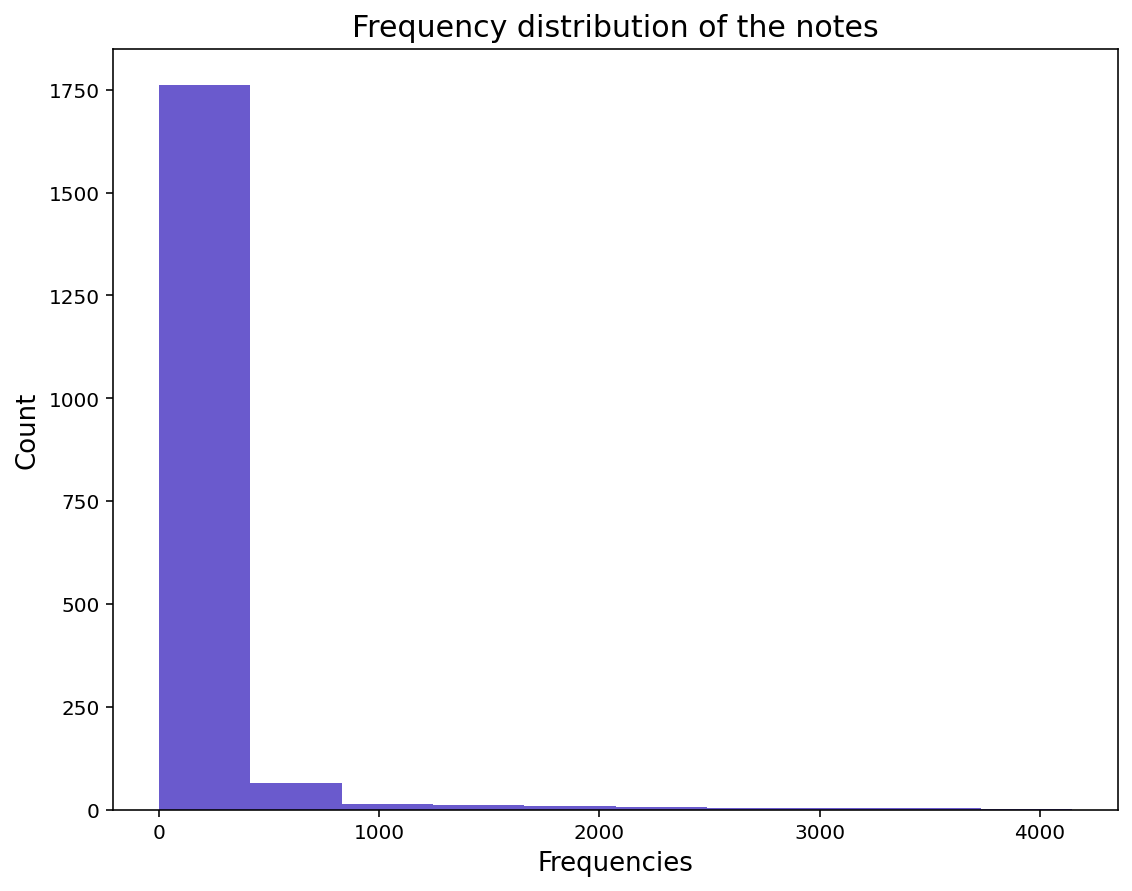

In [19]:
#computing frequency of each note
freq = dict(Counter(notes_))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(9,7))

#plot
plt.title("Frequency distribution of the notes", fontsize=15)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Frequencies', fontsize= 13)
plt.hist(no, color = 'slateblue');